Path found: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
Time taken to reach destination: 16


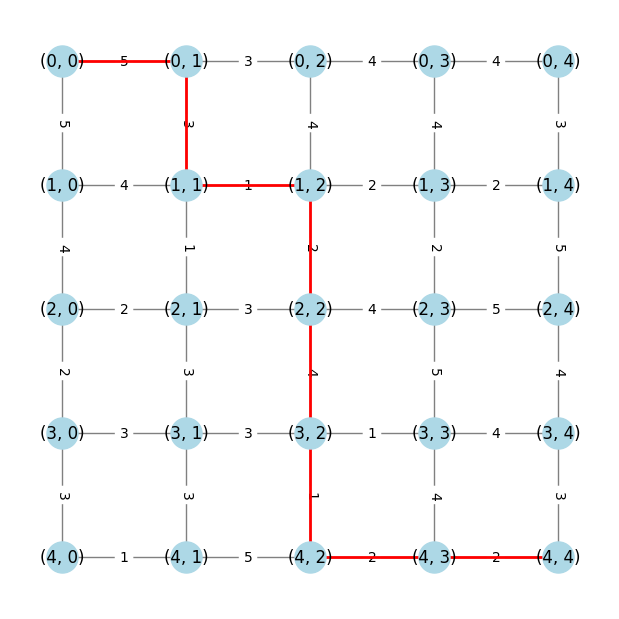

In [8]:
# Randomized A* Algo with traffic weight storage
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import time
import json

class Node:
    def __init__(self, position, parent=None, cost=1):
        self.position = position
        self.parent = parent
        self.g = float('inf')  # Cost from start to the current node
        self.h = 0  # Heuristic cost estimate to the goal
        self.f = float('inf')  # Total cost (f = g + h)
        self.cost = cost

    def __lt__(self, other):
        return self.f < other.f

def a_star_fastest_path(start, goal, graph):
    open_list = []
    closed_list = {}
    start_node = Node(start)
    start_node.g = 0
    start_node.f = start_node.h
    heapq.heappush(open_list, start_node)
    closed_list[start] = start_node.g

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            return reconstruct_path(current_node), current_node.g

        neighbors = get_neighbors(current_node.position, graph)

        for next_position, cost in neighbors:
            tentative_g = current_node.g + cost
            if next_position not in closed_list or tentative_g < closed_list[next_position]:
                closed_list[next_position] = tentative_g
                neighbor_node = Node(next_position, current_node, cost)
                neighbor_node.g = tentative_g
                neighbor_node.h = heuristic(neighbor_node.position, goal)
                neighbor_node.f = neighbor_node.g
                heapq.heappush(open_list, neighbor_node)

    return None, float('inf')

def get_neighbors(position, graph):
    neighbors = []
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    for d in directions:
        node_position = (position[0] + d[0], position[1] + d[1])
        if node_position in graph and graph[node_position] != float('inf'):
            neighbors.append((node_position, graph[node_position]))

    return neighbors

def heuristic(position, goal):
    return abs(position[0] - goal[0]) + abs(position[1] - goal[1])

def reconstruct_path(current_node):
    path = []
    while current_node is not None:
        path.append(current_node.position)
        current_node = current_node.parent
    return path[::-1]

def update_traffic(graph):
    traffic_weights = {}
    for edge in graph:
        if graph[edge] != float('inf'):
            traffic_weights[edge] = random.randint(1, 5)
            graph[edge] = traffic_weights[edge]
        else:
            traffic_weights[edge] = float('inf')
    return traffic_weights

def apply_traffic_weights(graph, traffic_weights):
    for node in graph:
        graph[node] = traffic_weights[node]

def draw_graph(graph, path=None):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)

    for node in graph:
        for neighbor, cost in get_neighbors(node, graph):
            G.add_edge(node, neighbor, weight=cost)

    pos = {node: (node[1], -node[0]) for node in G.nodes()}
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

# Helper to convert keys for JSON serialization
def tuple_to_str_key(d):
    return {str(k): v for k, v in d.items()}

def str_to_tuple_key(d):
    def parse_key(s):
        return tuple(map(int, s.strip("()").split(",")))
    return {parse_key(k): v for k, v in d.items()}

# Example usage
if __name__ == "__main__":
    base_graph = {(i, j): 1 for i in range(5) for j in range(5)}

    start = (0, 0)
    goal = (4, 4)

    graph = base_graph.copy()

    traffic_weights = update_traffic(graph)

    with open("traffic_weights.json", "w") as f:
        json.dump(tuple_to_str_key(traffic_weights), f)


    with open("traffic_weights.json", "r") as f:
        loaded_weights = json.load(f)
    traffic_weights = str_to_tuple_key(loaded_weights)


    apply_traffic_weights(graph, traffic_weights)

    path, time_taken = a_star_fastest_path(start, goal, graph)

    if path:
        print(f"Path found: {path}")
        print(f"Time taken to reach destination: {time_taken}")
        draw_graph(graph, path)
    else:
        print("No path found")
        draw_graph(graph)


Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
Total cost: 17


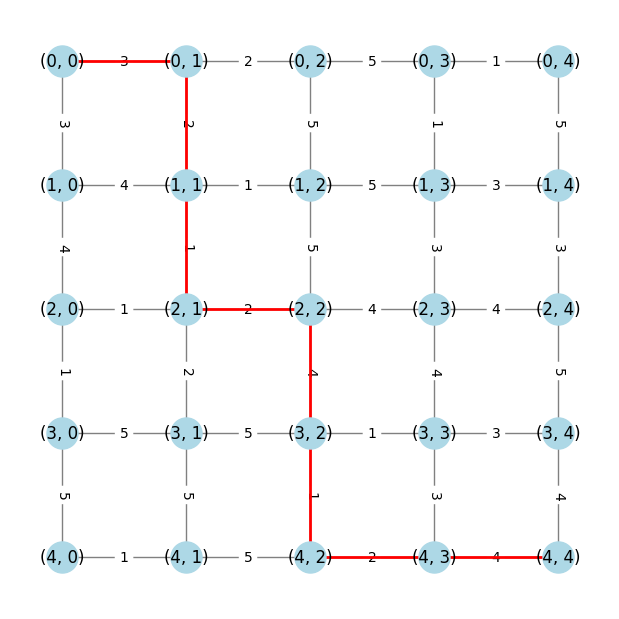

In [4]:
# Traditional A* Algo using stored weights
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import json

class Node:
    def __init__(self, position, parent=None, cost=1):
        self.position = position
        self.parent = parent
        self.g = float('inf')
        self.h = 0
        self.f = float('inf')
        self.cost = cost

    def __lt__(self, other):
        return self.f < other.f

def a_star_pathfinding(start, goal, graph):
    open_list = []
    closed_list = {}

    start_node = Node(start)
    start_node.g = 0
    start_node.h = heuristic(start, goal)
    start_node.f = start_node.g + start_node.h

    heapq.heappush(open_list, start_node)
    closed_list[start] = start_node.g

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            return reconstruct_path(current_node), current_node.g

        neighbors = get_neighbors(current_node.position, graph)

        for next_position, cost in neighbors:
            tentative_g = current_node.g + cost

            if next_position not in closed_list or tentative_g < closed_list[next_position]:
                closed_list[next_position] = tentative_g
                neighbor_node = Node(next_position, current_node, cost)
                neighbor_node.g = tentative_g
                neighbor_node.h = heuristic(neighbor_node.position, goal)
                neighbor_node.f = neighbor_node.g + neighbor_node.h
                heapq.heappush(open_list, neighbor_node)

    return None, float('inf')

def get_neighbors(position, graph):
    neighbors = []
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    for d in directions:
        node_position = (position[0] + d[0], position[1] + d[1])
        if node_position in graph and graph[node_position] != float('inf'):
            neighbors.append((node_position, graph[node_position]))

    return neighbors

def heuristic(position, goal):
    return abs(position[0] - goal[0]) + abs(position[1] - goal[1])

def reconstruct_path(current_node):
    path = []
    while current_node is not None:
        path.append(current_node.position)
        current_node = current_node.parent
    return path[::-1]

def draw_graph(graph, path=None):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)

    for node in graph:
        for neighbor, cost in get_neighbors(node, graph):
            G.add_edge(node, neighbor, weight=cost)

    pos = {node: (node[1], -node[0]) for node in G.nodes()}
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

# Load weights from JSON file
def str_to_tuple_key(d):
    def parse_key(s):
        return tuple(map(int, s.strip("()").split(",")))
    return {parse_key(k): v for k, v in d.items()}

# Example usage
if __name__ == "__main__":
    # Load traffic weights saved from Randomized A*
    with open("traffic_weights.json", "r") as f:
        loaded_weights = json.load(f)
    graph_with_traffic = str_to_tuple_key(loaded_weights)

    start = (0, 0)
    goal = (4, 4)

    path, cost = a_star_pathfinding(start, goal, graph_with_traffic)

    if path:
        print(f"Path found: {path}")
        print(f"Total cost: {cost}")
        draw_graph(graph_with_traffic, path)
    else:
        print("No path found")
        draw_graph(graph_with_traffic)


Traditional A* Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)], Cost: 8
Randomized A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)], Cost: 19


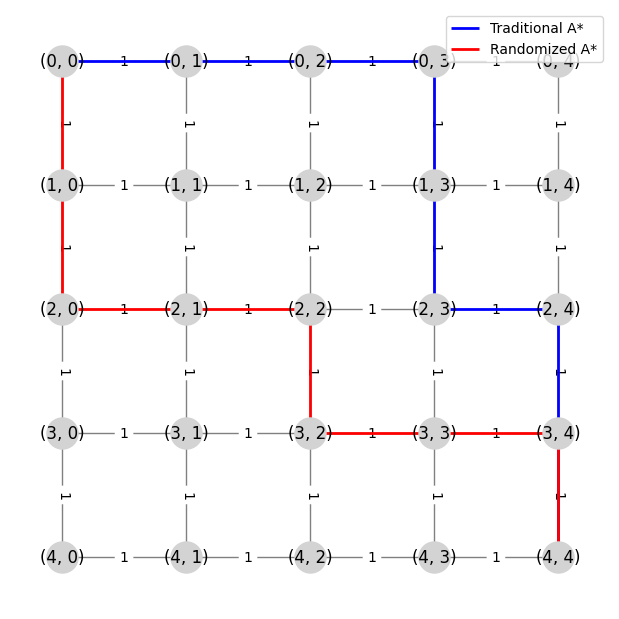

In [10]:
import heapq
import random
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, position, parent=None, cost=1):
        self.position = position
        self.parent = parent
        self.g = float('inf')  # Cost from start to this node
        self.h = 0  # Heuristic cost (Manhattan distance)
        self.f = float('inf')  # Total cost (f = g + h)
        self.cost = cost

    def __lt__(self, other):
        return self.f < other.f  # Priority queue ordering

def a_star_pathfinding(start, goal, graph, randomized=False):
    """ Implements A* algorithm (traditional or randomized). """
    open_list = []
    closed_list = {}

    start_node = Node(start)
    start_node.g = 0
    start_node.h = heuristic(start, goal)
    start_node.f = start_node.g + start_node.h

    heapq.heappush(open_list, start_node)
    closed_list[start] = start_node.g

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            return reconstruct_path(current_node), current_node.g

        neighbors = get_neighbors(current_node.position, graph, randomized)

        for next_position, cost in neighbors:
            tentative_g = current_node.g + cost

            if next_position not in closed_list or tentative_g < closed_list[next_position]:
                closed_list[next_position] = tentative_g
                neighbor_node = Node(next_position, current_node, cost)
                neighbor_node.g = tentative_g
                neighbor_node.h = heuristic(neighbor_node.position, goal)
                neighbor_node.f = neighbor_node.g + neighbor_node.h  # Correct A* formula
                heapq.heappush(open_list, neighbor_node)

    return None, float('inf')

def get_neighbors(position, graph, randomized=False):
    """ Returns valid neighbors. If randomized=True, traffic costs vary. """
    neighbors = []
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Up, Down, Left, Right

    for d in directions:
        node_position = (position[0] + d[0], position[1] + d[1])
        if node_position in graph:
            cost = graph[node_position]
            if randomized:
                cost = random.randint(1, 5)  # Simulate dynamic traffic
            neighbors.append((node_position, cost))

    return neighbors

def heuristic(position, goal):
    """ Manhattan Distance heuristic. """
    return abs(position[0] - goal[0]) + abs(position[1] - goal[1])

def reconstruct_path(current_node):
    """ Traces back the optimal path. """
    path = []
    while current_node is not None:
        path.append(current_node.position)
        current_node = current_node.parent
    return path[::-1]  # Reverse for start → goal

def draw_graph(graph, path1=None, path2=None):
    """ Visualizes both paths: traditional A* (blue) and randomized A* (red). """
    G = nx.Graph()
    for node in graph:
        G.add_node(node)

    for node in graph:
        for neighbor, cost in get_neighbors(node, graph, randomized=False):
            G.add_edge(node, neighbor, weight=cost)

    pos = {node: (node[1], -node[0]) for node in G.nodes()}
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if path1:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path1, path1[1:])), edge_color='blue', width=2, label="Traditional A*")

    if path2:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path2, path2[1:])), edge_color='red', width=2, label="Randomized A*")

    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    base_graph = {(i, j): 1 for i in range(5) for j in range(5)}  # Static uniform cost grid

    start = (0, 0)
    goal = (4, 4)

    # Run Traditional A*
    path_traditional, cost_traditional = a_star_pathfinding(start, goal, base_graph, randomized=False)

    # Run Randomized A*
    path_randomized, cost_randomized = a_star_pathfinding(start, goal, base_graph, randomized=True)

    # Print results
    print(f"Traditional A* Path: {path_traditional}, Cost: {cost_traditional}")
    print(f"Randomized A* Path: {path_randomized}, Cost: {cost_randomized}")

    # Draw graph with both paths
    draw_graph(base_graph, path_traditional, path_randomized)
